In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Двовимірна задача теплопровідності без джерела з неповними граничними умовами
c=1

# Задаємо кількість точок по часу
t0=0
tf=20
h=0.001
nt=math.floor((tf-t0)/h)

# Задаємо кількість точок по координатах
L=10
l=0.1
nx=math.floor(L/l)
ny=nx
x=np.array([round(l*i,3) for i in range (nx+1)])
y=np.array([round(l*i,3) for i in range (ny+1)])

#Задаємо заготовку таблиці, яку будемо заповнювати
u=[[[0 for i in range (nx+1)] for j in range(ny+1)]for k in range (nt+1)] #У такому масиві нумерація елементів йтиме як kji

# Задаємо початкові та граничні значення
for k in range(nt+1):
    for i in range(nx+1):
        u[k][0][i]=60 # гранична умова: значення в будь-який момент часу tk
# Прописали що в будь-який момент часу в будь-якій х координаті але при у=0 температура плівки є 60

for i in range(0,nx+1): #Для будь-яких х
    for j in range(1,ny+1): #та для у більше за 0, бо при y=0 має відмінну температуру, тому j від 1
        u[0][j][i]=10 #Початкові умови, k=0

#t1= time.process_time_ns()        
#Обчислюємо значення температури в плівці з часом
for k in range(nt):
    # Якби гранична умова при у=0 не була задана, то треба було робити ще 3 додаткові кроки для зсунутої схеми по у вліво
    # Через те, що ми вже знаємо значення функції в у=0 в будь-який момент часу, то по у ми починаємо схему з j=1
    for j in range(1,ny): #Використовується незсунута схема, тому не заходимо в точки на границях плівки
        for i in range(1,nx):
            u[k+1][j][i]=round(h*c/l/l*(u[k][j][i+1]-2*u[k][j][i]+u[k][j][i-1]+u[k][j+1][i]-2*u[k][j][i]+u[k][j-1][i])+u[k][j][i],3)
        # Порахуємо для і=0 на основі зсунутої схеми
        u[k+1][j][0]=round(h*c/l/l*(u[k][j][2]-2*u[k][j][1]+u[k][j][0]+u[k][j+1][0]-2*u[k][j][0]+u[k][j-1][0])+u[k][j][0],3)
        # Порахуємо для останнього і на основі зсунутої схеми
        u[k+1][j][-1]=round(h*c/l/l*(u[k][j][-1]-2*u[k][j][-2]+u[k][j][-3]+u[k][j+1][-1]-2*u[k][j][-1]+u[k][j-1][-1])+u[k][j][-1],3)
    # Порахумо для останнього j на основі зсунутої по у схеми
    j=ny
    for i in range(1,nx):
        u[k+1][j][i]=round(h*c/l/l*(u[k][j][i+1]-2*u[k][j][i]+u[k][j][i-1]+u[k][j][i]-2*u[k][j-1][i]+u[k][j-2][i])+u[k][j][i],3)
    u[k+1][j][0]=round(h*c/l/l*(u[k][j][2]-2*u[k][j][1]+u[k][j][0]+u[k][j][0]-2*u[k][j-1][0]+u[k][j-2][0])+u[k][j][0],3)
    u[k+1][j][-1]=round(h*c/l/l*(u[k][j][-1]-2*u[k][j][-2]+u[k][j][-3]+u[k][j][-1]-2*u[k][j-1][-1]+u[k][j-2][-1])+u[k][j][-1],3)
#t2= time.process_time_ns()
#print('Час обчислень',round((t2-t1)/1000000000,2),'с')

plt.contourf(x,y,u[-1],101)
plt.colorbar()

#print(u[-1])
#print(h*K/c/l/l)

Час обчислень 797.41 с


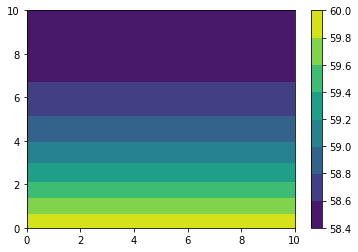

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Двовимірна задача теплопровідності без джерела, оптимізована
c=1

# Задаємо кількість точок по часу
t0=0
tf=20000
h=0.1
nt=math.floor((tf-t0)/h)
nt_ad=200 # Кількість точок у додатковому масиві, який ми будемо пропускати
nt1=math.floor(nt/nt_ad)

# Задаємо кількість точок по координатах
L=10
l=0.25
nx=math.floor(L/l)
ny=nx
x=np.array([round(l*i,3) for i in range (nx+1)])
y=np.array([round(l*i,3) for i in range (ny+1)])

#Задаємо заготовку додаткового масиву, який будемо заповнювати
u1=[[[0 for i in range (nx+1)] for j in range(ny+1)]for k in range (nt_ad+1)] #У такому масиві нумерація елементів йтиме як kji

# Задаємо початкові та граничні значення
for k in range(nt_ad+1):
    for i in range(nx+1):
        u1[k][0][i]=60 
for i in range(0,nx+1):
    for j in range(1,ny+1):
        u1[0][j][i]=10
        
#На даний момент в нульовому елементі додаткового масиву містяться початкові умови,які мають бути в основному масиві
u=[u1[0]]

t1= time.process_time_ns()        

#Задаємо великий цикл
for i in range(nt1):
    # Проводимо обчислення додаткового масиву
    for k in range(nt_ad):
        for j in range(1,ny):
            for i in range(1,nx):
                u1[k+1][j][i]=round(h*K/c/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j+1][i]-2*u1[k][j][i]+u1[k][j-1][i])+u1[k][j][i],3)
            u1[k+1][j][0]=round(h*K/c/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][j+1][0]-2*u1[k][j][0]+u1[k][j-1][0])+u1[k][j][0],3)
            u1[k+1][j][-1]=round(h*K/c/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j+1][-1]-2*u1[k][j][-1]+u1[k][j-1][-1])+u1[k][j][-1],3)
        j=ny
        for i in range(1,nx):
            u1[k+1][j][i]=round(h*K/c/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j][i]-2*u1[k][j-1][i]+u1[k][j-2][i])+u1[k][j][i],3)
        u1[k+1][j][0]=round(h*K/c/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][j][0]-2*u1[k][j-1][0]+u1[k][j-2][0])+u1[k][j][0],3)
        u1[k+1][j][-1]=round(h*K/c/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j][-1]-2*u1[k][j-1][-1]+u1[k][j-2][-1])+u1[k][j][-1],3)
    # Записуємо 200-тий елемент в додатковому масиві до основного масиву
    u.append([[u1[-1][j][i] for i in range(nx+1)] for j in range(ny+1)])
    # Задаємо нове початкове значення для додаткового масиву
    u1[0]=u1[-1]
    # І продовжуємо цикл
t2= time.process_time_ns()

print('Час обчислень',round((t2-t1)/1000000000,2),'с')

plt.contourf(x,y,u[-1])
plt.colorbar()

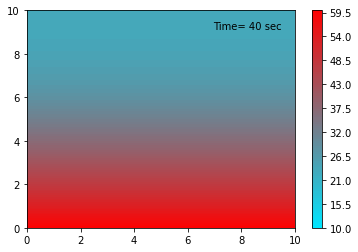

In [ ]:
# Побудова графіку функції з заданою кількості рівнів та в заданому кольорному розподілі
N=100 #Задає кількість кроків дискретизації по діапазону даних функції
zcont=[10+50*i/N for i in range(N+1)] # Масив значень функції, для кожного з яких буде свій колір
zcol=[(1.0*i/N,0.9-0.9*i/N,1.0-1.0*i/N) for i in range(N+1)] # Масив кольорів для кожного діапазону значень функції
plt.contourf(x,y,u[-1],zcont,colors=zcol) #Будується графік функції двох змінних
plt.text(9.5,9.5,'Time= 40 sec',fontsize = 10, ha='right', va='top')
plt.colorbar()

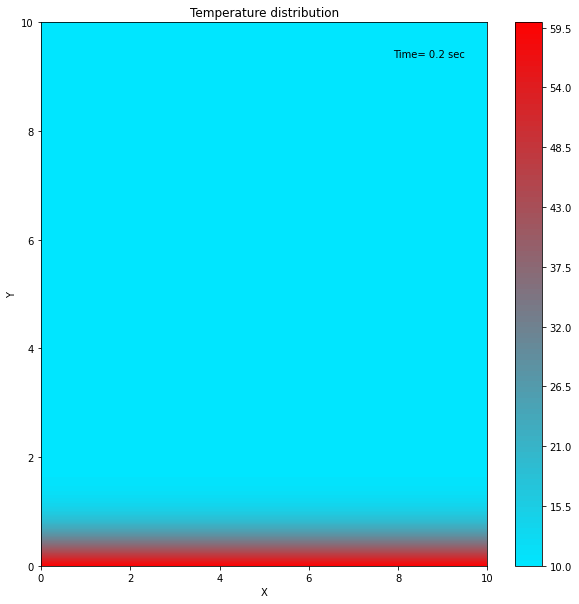

In [ ]:
#Створення анімації
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10, 10))
zcont=[10+50*i/N for i in range(N+1)] #Масив діапазонів значень температури для кожного кольору
zcol=[(1.0*i/N,0.9-0.9*i/N,1.0-1.0*i/N) for i in range(N+1)] #Масив кольорів
         
def animate(i): #Функція, яка для кожного і-го кадру анімації будує свій графік
    plt.gcf().clear() #Очищуємо фігуру
    plt.title('Temperature distribution') 
    plt.ylabel('Y')
    plt.xlabel('X')
    Z = u[i] #2д розподіл температури в момент часу ti
    plt.contourf(x,y,Z,zcont,colors=zcol) #Побудова графіку
    plt.colorbar() 
    plt.text(9.5,9.5,'Time= '+str(round(i*h,2))+' sec',fontsize = 10, ha='right', va='top')
    return fig

anim = FuncAnimation(fig, animate, frames=200, interval=2)
 
anim.save('Temperature_distribution_2D.gif', writer='imagemagick')

In [ ]:
# Збереження даних
import pandas as pd
writer = pd.ExcelWriter('Temperature2D.xlsx', engine='xlsxwriter')
X=pd.DataFrame(x)
X.to_excel(writer, 'Sheet1')
Y=pd.DataFrame(y)
Y.to_excel(writer, 'Sheet2')
U=pd.DataFrame(u)
U.to_excel(writer, 'Sheet3')
writer.save()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Двовимірна задача теплопровідності з квадратним включенням у плівці без джерела
def c(i,j):
    if (i in range(13,28) and j in range(13,28)):
        c=16
    else:
        c=8
    return (c)

def K(i,j):
    if (i in range(18,23) and j in range(18,23)):
        K=0.3
    else:
        K=1
    return (K)

# Задаємо кількість точок по часу
t0=0
tf=800
h=0.01
nt=math.floor((tf-t0)/h)
nt_ad=40
nt1=math.floor(nt/nt_ad)

# Задаємо кількість точок по координатах
L=10
l=0.25
nx=math.floor(L/l)
ny=nx
x=np.array([round(l*i,3) for i in range (nx+1)])
y=np.array([round(l*i,3) for i in range (ny+1)])

#Задаємо заготовку додаткового масиву, який будемо заповнювати
u1=[[[0 for i in range (nx+1)] for j in range(ny+1)]for k in range (nt_ad+1)] #У такому масиві нумерація елементів йтиме як kji

# Задаємо початкові та крайові значення
for k in range(nt_ad+1):
    for i in range(nx+1):
        u1[k][0][i]=60 
for i in range(0,nx+1):
    for j in range(1,ny+1):
        u1[0][j][i]=10
        
#На даний момент в нульовому елементі додаткового масиву містяться початкові умови,які мають бути в основному масиві
u=[u1[0]]

t1= time.process_time_ns()        

#Задаємо великий цикл
for m in range(nt1):
    # Проводимо обчислення додаткового масиву
    for k in range(nt_ad):
        for j in range(1,ny):
            for i in range(1,nx):
                u1[k+1][j][i]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j+1][i]-2*u1[k][j][i]+u1[k][j-1][i])+u1[k][j][i],3)
            u1[k+1][j][0]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][j+1][0]-2*u1[k][j][0]+u1[k][j-1][0])+u1[k][j][0],3)
            u1[k+1][j][-1]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j+1][-1]-2*u1[k][j][-1]+u1[k][j-1][-1])+u1[k][j][-1],3)
        j=ny
        for i in range(1,nx):
            u1[k+1][j][i]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j][i]-2*u1[k][j-1][i]+u1[k][j-2][i])+u1[k][j][i],3)
        u1[k+1][j][0]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][j][0]-2*u1[k][j-1][0]+u1[k][j-2][0])+u1[k][j][0],3)
        u1[k+1][j][-1]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j][-1]-2*u1[k][j-1][-1]+u1[k][j-2][-1])+u1[k][j][-1],3)
    # Записуємо 200-тий елемент в додатковому масиві до основного масиву
    u.append([[u1[-1][j][i] for i in range(nx+1)] for j in range(ny+1)])
    # Задаємо нове початкове значення для додаткового масиву
    u1[0]=u1[-1]
    # І продовжуємо цикл
t2= time.process_time_ns()

print('Час обчислень',round((t2-t1)/1000000000,2),'с')

N=100
zcont=[10+50*i/N for i in range(N+1)]
zcol=[(1.0*i/N,0.9-0.9*i/N,1.0-1.0*i/N) for i in range(N+1)]
plt.contourf(x,y,u[-1],zcont,colors=zcol)
plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Двовимірна задача теплопровідності у тришаровій структурі без джерела
def c(j,i):
    if j in range(18,23):
        c=16
    else:
        c=8
    return (c)

def K(j,i):
    if j in range(18,23):
        K=0.3
    else:
        K=1
    return (K)

# Задаємо кількість точок по часу
t0=0
tf=800
h=0.01
nt=math.floor((tf-t0)/h)
nt_ad=40
nt1=math.floor(nt/nt_ad)

# Задаємо кількість точок по координатах
L=10
l=0.25
nx=math.floor(L/l)
ny=nx
x=np.array([round(l*i,3) for i in range (nx+1)])
y=np.array([round(l*i,3) for i in range (ny+1)])

#Задаємо заготовку додаткового масиву, який будемо заповнювати
u1=[[[0 for i in range (nx+1)] for j in range(ny+1)]for k in range (nt_ad+1)] #У такому масиві нумерація елементів йтиме як kji

# Задаємо початкові та крайові значення
for k in range(nt_ad+1):
    for i in range(nx+1):
        u1[k][0][i]=60 
for i in range(0,nx+1):
    for j in range(1,ny+1):
        u1[0][j][i]=10
        
#На даний момент в нульовому елементі додаткового масиву містяться початкові умови,які мають бути в основному масиві
u=[u1[0]]

t1= time.process_time_ns()        

#Задаємо великий цикл
for m in range(nt1):
    # Проводимо обчислення додаткового масиву
    for k in range(nt_ad):
        for j in range(1,ny):
            for i in range(1,nx):
                u1[k+1][j][i]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j+1][i]-2*u1[k][j][i]+u1[k][j-1][i])+u1[k][j][i],3)
            u1[k+1][j][0]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][j+1][0]-2*u1[k][j][0]+u1[k][j-1][0])+u1[k][j][0],3)
            u1[k+1][j][-1]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j+1][-1]-2*u1[k][j][-1]+u1[k][j-1][-1])+u1[k][j][-1],3)
        j=ny
        for i in range(1,nx):
            u1[k+1][j][i]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j][i]-2*u1[k][j-1][i]+u1[k][j-2][i])+u1[k][j][i],3)
        u1[k+1][j][0]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][j][0]-2*u1[k][j-1][0]+u1[k][j-2][0])+u1[k][j][0],3)
        u1[k+1][j][-1]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j][-1]-2*u1[k][j-1][-1]+u1[k][j-2][-1])+u1[k][j][-1],3)
    # Записуємо 200-тий елемент в додатковому масиві до основного масиву
    u.append([[u1[-1][j][i] for i in range(nx+1)] for j in range(ny+1)])
    # Задаємо нове початкове значення для додаткового масиву
    u1[0]=u1[-1]
    # І продовжуємо цикл
t2= time.process_time_ns()

print('Час обчислень',round((t2-t1)/1000000000,2),'с')

N=100
zcont=[10+50*i/N for i in range(N+1)]
zcol=[(1.0*i/N,0.9-0.9*i/N,1.0-1.0*i/N) for i in range(N+1)]
plt.contourf(x,y,u[-1],zcont,colors=zcol)
plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Двовимірна задача теплопровідності з круглим включенням у плівці
def c(j,i):
    if ((i-20)**2+(j-20)**2<=100):
        c=16
    else:
        c=8
    return (c)

def K(j,i):
    if (i-20)**2+(j-20)**2<=100:
        K=0.3
    else:
        K=1
    return (K)

# Задаємо кількість точок по часу
t0=0
tf=800
h=0.01
nt=math.floor((tf-t0)/h)
nt_ad=40
nt1=math.floor(nt/nt_ad)

# Задаємо кількість точок по координатах
L=10
l=0.25
nx=math.floor(L/l)
ny=nx
x=np.array([round(l*i,3) for i in range (nx+1)])
y=np.array([round(l*i,3) for i in range (ny+1)])

#Задаємо заготовку додаткового масиву, який будемо заповнювати
u1=[[[0 for i in range (nx+1)] for j in range(ny+1)]for k in range (nt_ad+1)] #У такому масиві нумерація елементів йтиме як kji

# Задаємо початкові та крайові значення
for k in range(nt_ad+1):
    for i in range(nx+1):
        u1[k][0][i]=60 
for i in range(0,nx+1):
    for j in range(1,ny+1):
        u1[0][j][i]=10
        
#На даний момент в нульовому елементі додаткового масиву містяться початкові умови,які мають бути в основному масиві
u=[u1[0]]

t1= time.process_time_ns()        

#Задаємо великий цикл
for m in range(nt1):
    # Проводимо обчислення додаткового масиву
    for k in range(nt_ad):
        for j in range(1,ny):
            for i in range(1,nx):
                u1[k+1][j][i]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j+1][i]-2*u1[k][j][i]+u1[k][j-1][i])+u1[k][j][i],3)
            u1[k+1][j][0]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][j+1][0]-2*u1[k][j][0]+u1[k][j-1][0])+u1[k][j][0],3)
            u1[k+1][j][-1]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j+1][-1]-2*u1[k][j][-1]+u1[k][j-1][-1])+u1[k][j][-1],3)
        j=ny
        for i in range(1,nx):
            u1[k+1][j][i]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j][i]-2*u1[k][j-1][i]+u1[k][j-2][i])+u1[k][j][i],3)
        u1[k+1][j][0]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][j][0]-2*u1[k][j-1][0]+u1[k][j-2][0])+u1[k][j][0],3)
        u1[k+1][j][-1]=round(2*h*K(j,i)/c(j,i)/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j][-1]-2*u1[k][j-1][-1]+u1[k][j-2][-1])+u1[k][j][-1],3)
    # Записуємо 200-тий елемент в додатковому масиві до основного масиву
    u.append([[u1[-1][j][i] for i in range(nx+1)] for j in range(ny+1)])
    # Задаємо нове початкове значення для додаткового масиву
    u1[0]=u1[-1]
    # І продовжуємо цикл
t2= time.process_time_ns()

print('Час обчислень',round((t2-t1)/1000000000,2),'с')

N=100
zcont=[10+50*i/N for i in range(N+1)]
zcol=[(1.0*i/N,0.9-0.9*i/N,1.0-1.0*i/N) for i in range(N+1)]
plt.contourf(x,y,u[-1],zcont,colors=zcol)
plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Двовимірна задача теплопровідності з квадратним включенням у плівці без джерела з граничними умовами
# Граничні умови задають відсутність дифузії на границях
def c(i,j):
    if (i in range(13,28) and j in range(13,28)):
        c=16
    else:
        c=8
    return (c)

def K(i,j):
    if (i in range(18,23) and j in range(18,23)):
        K=0.3
    else:
        K=1
    return (K)

# Задаємо кількість точок по часу
t0=0
tf=800
h=0.01
nt=math.floor((tf-t0)/h)
nt_ad=40
nt1=math.floor(nt/nt_ad)

# Задаємо кількість точок по координатах
L=10
l=0.25
nx=math.floor(L/l)
ny=nx
x=np.array([round(l*i,3) for i in range (nx+1)])
y=np.array([round(l*i,3) for i in range (ny+1)])

#Задаємо заготовку додаткового масиву, який будемо заповнювати
u1=[[[0 for i in range (nx+1)] for j in range(ny+1)]for k in range (nt_ad+1)] #У такому масиві нумерація елементів йтиме як kji

# Задаємо початкові та крайові значення
for k in range(nt_ad+1):
    for i in range(nx+1):
        u1[k][0][i]=60 
for i in range(0,nx+1):
    for j in range(1,ny+1):
        u1[0][j][i]=10
        
#На даний момент в нульовому елементі додаткового масиву містяться початкові умови,які мають бути в основному масиві
u=[u1[0]]

t1= time.process_time_ns()        

#Задаємо великий цикл
for m in range(nt1):
    # Проводимо обчислення додаткового масиву
    for k in range(nt_ad):
        for j in range(1,ny):
            for i in range(1,nx):
                u1[k+1][j][i]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j+1][i]-2*u1[k][j][i]+u1[k][j-1][i])+u1[k][j][i],3)
            u1[k+1][j][0]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j+1][0]-2*u1[k][j][0]+u1[k][j-1][0])+u1[k][j][0],3)
            u1[k+1][j][-1]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j+1][-1]-2*u1[k][j][-1]+u1[k][j-1][-1])+u1[k][j][-1],3)
        j=ny
        for i in range(1,nx):
            u1[k+1][j][i]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1])+u1[k][j][i],3)
        u1[k+1][j][0]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][j][0]-2*u1[k][j-1][0]+u1[k][j-2][0])+u1[k][j][0],3)
        u1[k+1][j][-1]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j][-1]-2*u1[k][j-1][-1]+u1[k][j-2][-1])+u1[k][j][-1],3)
    # Записуємо 200-тий елемент в додатковому масиві до основного масиву
    u.append([[u1[-1][j][i] for i in range(nx+1)] for j in range(ny+1)])
    # Задаємо нове початкове значення для додаткового масиву
    u1[0]=u1[-1]
    # І продовжуємо цикл
t2= time.process_time_ns()

print('Час обчислень',round((t2-t1)/1000000000,2),'с')

N=100
zcont=[10+50*i/N for i in range(N+1)]
zcol=[(1.0*i/N,0.9-0.9*i/N,1.0-1.0*i/N) for i in range(N+1)]
plt.contourf(x,y,u[-1],zcont,colors=zcol)
plt.colorbar()

# New

Частина, яку зручно брати за основу

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time
from matplotlib.animation import FuncAnimation

# Двовимірна задача розмноження та дифузії популяції
# Взагалі немає крайових умов
# Є швидкість розмноження, все одно що джерело тепла чи джерело речовини
def c(j,i):
    if ((i-20)**2+(j-20)**2<=100):
        c=10
    else:
        c=20
    return (c)

# Задаємо кількість точок по часу
t0=0
tf=10
h=0.001
nt_ad=math.floor((tf-t0)/h)

# Задаємо кількість точок по координатах
L=10
l=0.25
nx=math.floor(L/l)
ny=nx
x=np.array([round(l*i,3) for i in range (nx+1)])
y=np.array([round(l*i,3) for i in range (ny+1)])

#Задаємо заготовку додаткового масиву, який будемо заповнювати
u1=[[[0 for i in range (nx+1)] for j in range(ny+1)]for k in range (nt_ad+1)] #У такому масиві нумерація елементів йтиме як kji

# Задаємо початкові значення
for i in range(0,nx+1):
    for j in range(0,ny+1):
        if ((i-20)**2+(j-20)**2<=25):
            u1[0][j][i]=10
        
#На даний момент в нульовому елементі додаткового масиву містяться початкові умови,які мають бути в основному масиві
u=[u1[0]]

#Задаємо рівняння розвитку популяції - швидкість (джерело тепла, джерело речовини)
def function(u):
    return(0.02*u**2*(100-u)/100-0.1*u)

t1= time.process_time_ns()        

#Задаємо великий цикл
for m in range(1):
    # Проводимо обчислення додаткового масиву
    for k in range(nt_ad):
        j=0
        for i in range(1,nx):
            # Зсунута вліво по у
            u1[k+1][j][i]=round(h* c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j][i]-2*u1[k][j-1][i]+u1[k][j-2][i])+u1[k][j][i]+h*function(u1[k][j][i]),3)
        # Зсунута вліво по у та вліво по х
        u1[k+1][j][0]=round(h* c(j,i)/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][2][0]-2*u1[k][1][0]+u1[k][0][0])+u1[k][j][0]+h*function(u1[k][j][0]),3)
        # Зсунута вліво по у по вправо по х
        u1[k+1][j][-1]=round(h* c(j,i)/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j][2]-2*u1[k][1][-1]+u1[k][0][-1])+u1[k][j][-1]+h*function(u1[k][j][-1]),3)
        # Звичайна схема
        for j in range(1,ny):
            for i in range(1,nx):
                u1[k+1][j][i]=round(h* c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j+1][i]-2*u1[k][j][i]+u1[k][j-1][i])+u1[k][j][i]+h*function(u1[k][j][i]),3)
            u1[k+1][j][0]=round(h* c(j,i)/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][j+1][0]-2*u1[k][j][0]+u1[k][j-1][0])+u1[k][j][0]+h*function(u1[k][j][0]),3)
            u1[k+1][j][-1]=round(h* c(j,i)/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j+1][-1]-2*u1[k][j][-1]+u1[k][j-1][-1])+u1[k][j][-1]+h*function(u1[k][j][-1]),3)
        j=ny
        for i in range(1,nx):
            # Зсунута вправо по у
            u1[k+1][j][i]=round(2*h* c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]+u1[k][j][i-1]+u1[k][j][i]-2*u1[k][j-1][i]+u1[k][j-2][i])+u1[k][j][i]+h*function(u1[k][j][i]),3)
         # Зсунута вправо по у та вліво по х
        u1[k+1][j][0]=round(2*h* c(j,i)/l/l*(u1[k][j][2]-2*u1[k][j][1]+u1[k][j][0]+u1[k][j][0]-2*u1[k][j-1][0]+u1[k][j-2][0])+u1[k][j][0]+h*function(u1[k][j][0]),3)
         # Зсунута вправо по у по вправо по х
        u1[k+1][j][-1]=round(2*h* c(j,i)/l/l*(u1[k][j][-1]-2*u1[k][j][-2]+u1[k][j][-3]+u1[k][j][-1]-2*u1[k][j-1][-1]+u1[k][j-2][-1])+u1[k][j][-1]+h*function(u1[k][j][-1]),3)
    # Записуємо 200-тий елемент в додатковому масиві до основного масиву
    u.append([[u1[-1][j][i] for i in range(nx+1)] for j in range(ny+1)])
    # Задаємо нове початкове значення для додаткового масиву
    # u1[0]=u1[-1]
    # І продовжуємо цикл
t2= time.process_time_ns()

print('Час обчислень',round((t2-t1)/1000000000,2),'с')

N=100
#zcont=[0+100*i/N for i in range(N+1)]
zcol=[(1.0,1.0-1.0*i/N,1.0-1.0*i/N) for i in range(N+1)]

fig = plt.figure(figsize=(10, 10))
         
P=10
def animate(i):
    plt.gcf().clear()
    plt.title('Population diffusion')
    plt.ylabel('Y')
    plt.xlabel('X')
    Z = u1[P*i]
    plt.contourf(x,y,Z,N,colors=zcol)
    plt.colorbar() 
    plt.text(9.5,9.5,'Time= '+str(round(i*h,2))+' sec',fontsize = 10, ha='right', va='top')
    return fig

anim = FuncAnimation(fig, animate, frames=math.floor(nt_ad/P), interval=2)
 
anim.save('Population diffusion_2D.gif', writer='pillow')

In [ ]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Двовимірна задача теплопровідності з джерелом тепла з граничними умовами
# Граничні умови задають сталу температуру на краях плівки
def coffs(j,i):
    if ((i-5)**2+(j-5)**2<=9) or ((i-15)**2+(j-15)**2<=16) or ((i-32)**2+(j-6)**2<=9):
        c=16
        K=0.3
    else:
        c=8
        K=1
    return (c,K)

def c(j,i):
    return (coffs(j,i)[0])

def K(j,i):
    return (coffs(j,i)[1])

# Задаємо кількість точок по часу
t0=0
tf=40
h=0.01
nt=math.floor((tf-t0)/h)
nt_ad=400
nt1=math.floor(nt/nt_ad)

# Задаємо кількість точок по координатах
L=10
l=0.25
nx=math.floor(L/l)
ny=nx
x=np.array([round(l*i,3) for i in range (nx+1)])
y=np.array([round(l*i,3) for i in range (ny+1)])

#Задаємо заготовку додаткового масиву, який будемо заповнювати
u1=[[[0 for i in range (nx+1)] for j in range(ny+1)]for k in range (nt_ad+1)] #У такому масиві нумерація елементів йтиме як kji

# Задаємо початкові та крайові значення
for i in range(0,nx+1):
    for j in range(0,ny+1):
        u1[0][j][i]=10
for k in range(nt_ad+1):
    for i in [0,nx]:
        for j in range(0,ny+1):
            u1[k][j][i]=10
    for j in [0,ny]:
        for i in range(0,nx+1):
            u1[k][j][i]=10
        
#На даний момент в нульовому елементі додаткового масиву містяться початкові умови,які мають бути в основному масиві
u=[u1[0]]

#Задаємо джерело
def function(k,j,i):
    Q=2*h/c(j,i)
    return(Q)

t1= time.process_time_ns()        

#Задаємо великий цикл
for m in range(1):
    # Проводимо обчислення додаткового масиву
    for k in range(nt_ad):
        for j in range(1,ny):
            for i in range(1,nx):
                u1[k+1][j][i]=round(h*K(j,i)/c(j,i)/l/l*(u1[k][j][i+1]-2*u1[k][j][i]
                                    +u1[k][j][i-1]+u1[k][j+1][i]-2*u1[k][j][i]+u1[k][j-1][i])
                                    +u1[k][j][i]+function(k,j,i),5)
    # Записуємо 200-тий елемент в додатковому масиві до основного масиву
    u.append([[u1[-1][j][i] for i in range(nx+1)] for j in range(ny+1)])
    # Задаємо нове початкове значення для додаткового масиву
    #u1[0]=u1[-1]
    # І продовжуємо цикл
    print(m)
t2= time.process_time_ns()

print('Час обчислень',round((t2-t1)/1000000000,2),'с')

N=100
zcont=[10+50*i/N for i in range(N+1)]
zcol=[(1.0*i/N,0.9-0.9*i/N,1.0-1.0*i/N) for i in range(N+1)]

fig = plt.figure(figsize=(10, 10))

In [ ]:
N=10
zcont=[10+50*i/N for i in range(N+1)]
zcol=[(0.1*i,0.4-0.4*i/N,1.0-1.0*i/N) for i in range(N+1)]
plt.contourf(x,y,u1[-1],zcont,colors=zcol)
plt.colorbar()